In [130]:
# function that return all the binary relations possible between n nodes
# example: relations(3) = [(0,0),(0,1),(1,0),(1,1),(0,2),(1,2),(2,0),(2,1),(2,2)]
def relations(n):
    return [(i,j) for i in range(n) for j in range(n)]

In [131]:
r = relations(1)
print(r)

[(0, 0)]


In [132]:
# return all the relation possible between n nodes

# all_relation(2) return :
# [[(0, 0), (0, 1), (1, 0), (1, 1)],
# [(0, 0), (0, 1), (1, 0)],
# [(0, 0), (0, 1), (1, 1)],
# [(0, 0), (0, 1)],
# [(0, 0), (1, 0), (1, 1)],
# [(0, 0), (1, 0)],
# [(0, 0), (1, 1)],
# [(0, 0)],
# [(0, 1), (1, 0), (1, 1)],
# [(0, 1), (1, 0)],
# [(0, 1), (1, 1)],
# [(0, 1)],
# [(1, 0), (1, 1)],
# [(1, 0)],
# [(1, 1)],
# []]


def all_relation(n):
    rels = [[]]
    for relation in relations(n):
        rels += [rel + [relation] for rel in rels]
    return rels
        

In [133]:
def parties ( ensemble : list ) :
    # condition d'arret
    if len (ensemble) == 1:
        return [ensemble] + [[]]
    # appel recursif
    else :
        # recuperer les sous-partitions
        previous_suite = parties (ensemble[1:])
        # print(previous_suite)
        # construire les partitions
        new_suite = []
        for subpartition in previous_suite :
            new_suite.append ( [ensemble [0]] + subpartition )
            new_suite.append ( subpartition )
        
        return new_suite

In [134]:
parties(relations(2))

[[(0, 0), (0, 1), (1, 0), (1, 1)],
 [(0, 1), (1, 0), (1, 1)],
 [(0, 0), (1, 0), (1, 1)],
 [(1, 0), (1, 1)],
 [(0, 0), (0, 1), (1, 1)],
 [(0, 1), (1, 1)],
 [(0, 0), (1, 1)],
 [(1, 1)],
 [(0, 0), (0, 1), (1, 0)],
 [(0, 1), (1, 0)],
 [(0, 0), (1, 0)],
 [(1, 0)],
 [(0, 0), (0, 1)],
 [(0, 1)],
 [(0, 0)],
 []]

In [135]:
#EXO2

def mat_adj(n:int, rel:list[tuple[int,int]]) -> matrix:
    A = matrix(n) # On crée une matrice n*n
    for x in range(n):
        for y in range(n): # On parcourt la matrice
            if (x,y) in rel:
                A[x,y] = 1 # Si la relation est dans la liste des relations, on met 1
    return A

In [136]:
mat_adj(3, [(0,1),(1,2)])

[0 1 0]
[0 0 1]
[0 0 0]

In [137]:
# limit number in matrix to 1
def mat_ceil(A: matrix) -> matrix:
    for x in range(A.nrows()):
        for y in range(A.ncols()): # On parcourt la matrice
            A[x,y] = 1 if A[x,y] > 0 else 0 # Si on est supérieur à 1, on met 1
    return A

In [138]:
# binary addition
def oplus(A,B):
    return mat_ceil(A+B)

In [139]:
# two relations on E10
relA = [(0 ,0), (1,2), (2,4), (3,6), (4,8)] # n RA m \iff m = 2n
relB = [(0 ,0), (1,3), (2,6), (3,9)] # n RB m \iff m = 3n
A = mat_adj (10, relA)
B = mat_adj (10, relB)
print(oplus(A,B))

[1 0 0 0 0 0 0 0 0 0]
[0 0 1 1 0 0 0 0 0 0]
[0 0 0 0 1 0 1 0 0 0]
[0 0 0 0 0 0 1 0 0 1]
[0 0 0 0 0 0 0 0 1 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [140]:
# binary multiplication
def otimes(A,B):
    return mat_ceil(A*B)

In [141]:
# two relations on E10
relA = [(0 ,0), (1,2), (2,4), (3,6), (4,8)] # n RA m \iff m = 2n
relB = [(0 ,0), (1,3), (2,6), (3,9)] # n RB m \iff m = 3n
A = mat_adj (10, relA)
B = mat_adj (10, relB)
print(otimes(A,B)) # two bits at (0,0) and (1,6)

[1 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 1 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0]


In [142]:
# Si A est inclus dans B alors A+B = A car B ne rajoute rien à A
def is_contained(A,B):
    return oplus(A,B) == A

In [143]:
# two relations on E10
relA = [(0 ,0), (1,2), (2,4), (3,6), (4,8)]
relB = [(0 ,0), (1,2), (4,8)]
A = mat_adj (10, relA)
B = mat_adj (10, relB)
print(is_contained(A,B))
print(is_contained(B,A))

True
False


In [144]:
#EXO3

# generate a binary relation on n nodes
def random_relation(n : int):
    return [(i,j) for i in range(n) for j in range(n) if random() < 1/9]

In [145]:
size = 40
adj = mat_adj(size, random_relation(size))

g = DiGraph(adj)
g


TypeError: 'DiGraph' object is not callable

In [ ]:
g = DiGraph({0: [1, 2, 3], 2: [4]}); g

TypeError: 'DiGraph' object is not callable

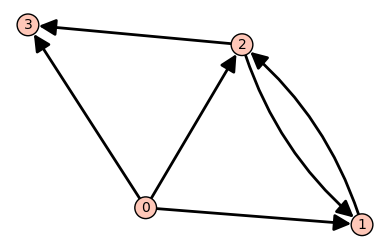

NameError: name 'strongly_connected_components_digraph' is not defined

In [ ]:
g = DiGraph({0: {1: "01", 2: "02", 3: "03"}, 1: {2: "12"}, 2:{1: "21", 3: "23"}})
show(g)
scc_digraph = strongly_connected_components_digraph(g)
scc_digraph.is_isomorphic(digraphs.TransitiveTournament(3))